In [1]:
%matplotlib inline

from autolens.model.profiles import light_profiles
from autolens.model.profiles import mass_profiles
from autolens.data.array import grids
from autolens.model.profiles.plotters import profile_plotters

In [2]:
grid_stack = grids.GridStack.from_shape_pixel_scale_and_sub_grid_size(
    shape=(100, 100), pixel_scale=0.05, sub_grid_size=2)

In [3]:
sersic_light_profile = light_profiles.EllipticalSersic(
    centre=(2.0, 1.0), axis_ratio=0.8, phi=45.0, intensity=1.0, effective_radius=1.0, sersic_index=2.5)

print(sersic_light_profile)

EllipticalSersic
centre: (2.0, 1.0)
axis_ratio: 0.8
phi: 45.0
intensity: 1.0
effective_radius: 1.0
sersic_index: 2.5


In [4]:
light_profile_intensities = sersic_light_profile.intensities_from_grid(grid=grid_stack.regular)

print('intensity of regular-grid pixel 1:')
print(light_profile_intensities[0])
print('intensity of regular-grid pixel 2:')
print(light_profile_intensities[1])
print()

intensity of regular-grid pixel 1:
0.04189641523797503
intensity of regular-grid pixel 2:
0.04374944008398025



In [5]:
print('intensity of central regular-grid pixels:')
print(light_profile_intensities[4949])
print(light_profile_intensities[4950])
print(light_profile_intensities[5049])
print(light_profile_intensities[5050])

intensity of central regular-grid pixels:
0.2139224291964037
0.21768248978167098
0.20280515120326098
0.20618046630076836


We can use a profile plotter to plot this intensity map (this maps the regular-grid to 2D before plotting).

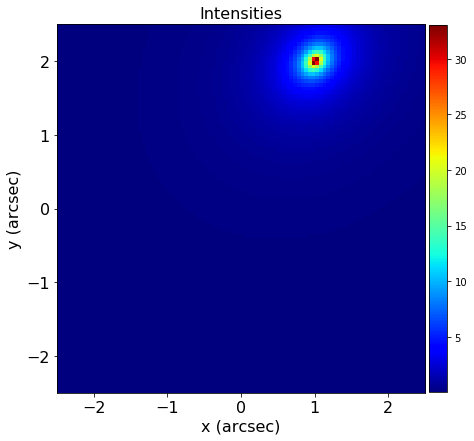

In [7]:
profile_plotters.plot_intensities(light_profile=sersic_light_profile, grid=grid_stack.regular)

Lets create a singular isothermal sphere (SIS) mass-profile using the 'mass-profiles' module.

In [8]:
sis_mass_profile = mass_profiles.SphericalIsothermal(
    centre=(0.1, 0.1), einstein_radius=1.6)

print(sis_mass_profile)

SphericalIsothermal
centre: (0.1, 0.1)
axis_ratio: 1.0
phi: 0.0
einstein_radius: 1.6
slope: 2.0
core_radius: 0.0


Just like above, we can pass a grid to a mass-profile to compute its deflection angles (still in 1D).

(If you are new to gravitiational lensing, and are unclear on what a 'deflection-angle' means or what it is used for, then I'll explain all in tutorial 4 of this chapter. For now, just look at the pretty pictures  they make, and worry about what they mean in tutorial 4!).

In [9]:
mass_profile_deflections = sis_mass_profile.deflections_from_grid(grid=grid_stack.regular)
print('deflection-angles of regular-grid pixel 1:')
print(mass_profile_deflections[0])
print('deflection-angles of regular-grid pixel 2:')
print(mass_profile_deflections[1])
print()
print('deflection-angles of central regular-grid pixels:')
print(mass_profile_deflections[4949])
print(mass_profile_deflections[4950])
print(mass_profile_deflections[5049])
print(mass_profile_deflections[5050])

deflection-angles of regular-grid pixel 1:
[ 1.08477382 -1.17612319]
deflection-angles of regular-grid pixel 2:
[ 1.09622353 -1.1654587 ]

deflection-angles of central regular-grid pixels:
[-0.82319321 -1.37198868]
[-1.13137085 -1.13137085]
[-1.13137085 -1.13137085]
[-1.37198868 -0.82319321]


And again, a profile plotter can plot these deflection angles in 2D.

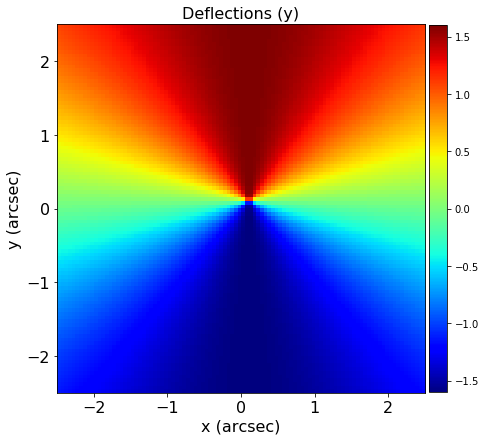

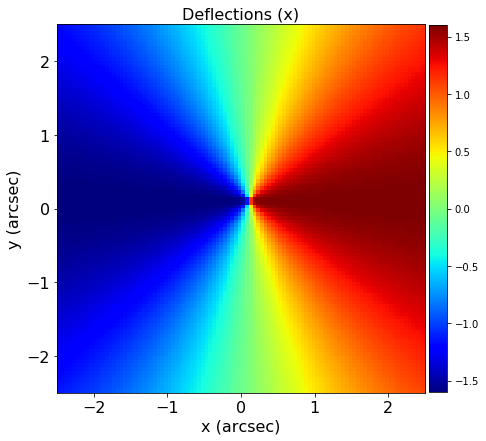

In [11]:
profile_plotters.plot_deflections_y(mass_profile=sis_mass_profile, grid=grid_stack.regular)
profile_plotters.plot_deflections_x(mass_profile=sis_mass_profile, grid=grid_stack.regular)

Mass-profiles also have a convergence (dimensionless surface-density) and gravitational potential, which can be plotted in the same way.

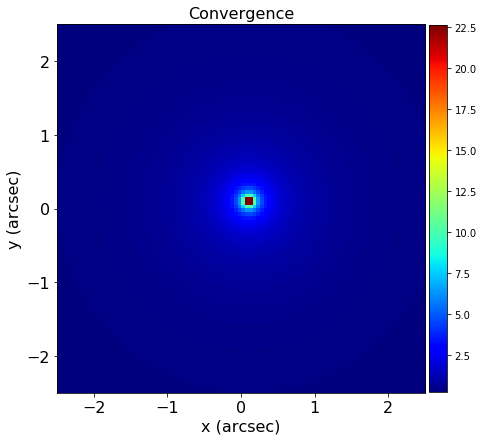

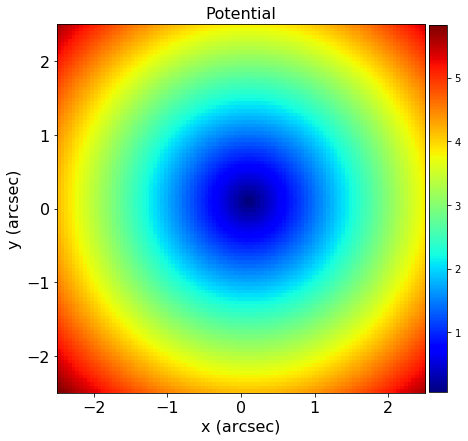

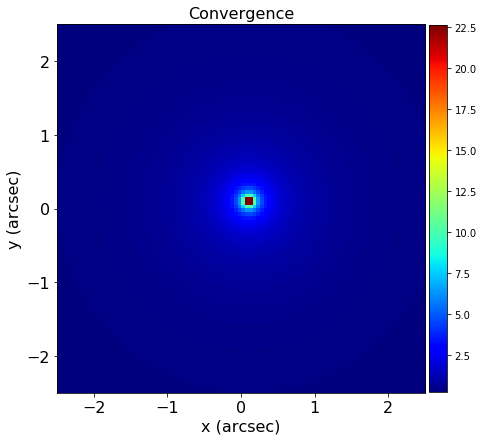

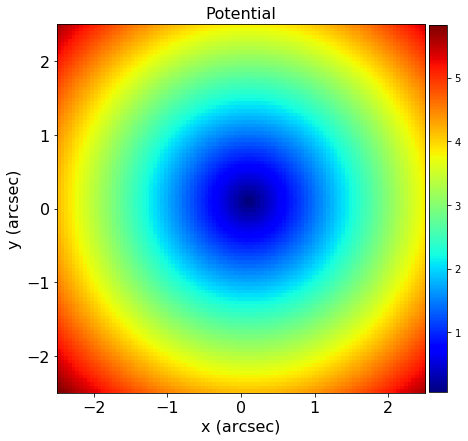

In [12]:
mass_profile_convergence = sis_mass_profile.convergence_from_grid(grid=grid_stack.regular)
mass_profile_potential = sis_mass_profile.potential_from_grid(grid=grid_stack.regular)
profile_plotters.plot_convergence(mass_profile=sis_mass_profile, grid=grid_stack.regular)
profile_plotters.plot_potential(mass_profile=sis_mass_profile, grid=grid_stack.regular)

Congratulations, you've completed your second PyAutoLens tutorial! Before moving on to the next one, experiment with PyAutoLens by doing the following:

1) Change the light profile's effective radius and Sersic index - how does the image's appearance change?

2) Change the mass profile's einstein radius - what happens to the deflection angles, potential and surface density?

3) Experiment with different light-profiles and mass-profiles in the light_profiles and mass_profiles modules. In particular, use the EllipticalIsothermal profile to introduce ellipticity into a mass profile.